In [1]:
import matplotlib.pyplot as pl
import numpy as np

%matplotlib inline

In [2]:
m = 40.0
T = 270.0
kb = 1.38e-23

def TN_PSD(f,Q):
    
    w = 2*np.pi*f
    
    w0 = 1.0*(2*np.pi)
    gamma = w0/Q
    b = gamma*m
    
    re = 1/( (w**2-w0**2)**2 + (gamma*w)**2) 
    s = (4.0*kb*T*gamma/m) * re
    
    return s

In [3]:
ang_f = np.linspace(.01,100,100000)
psd_list = []


n = 5
q_ar = np.logspace(1,3,num=n)

for i in range(n):
    out = TN_PSD(ang_f,q_ar[i])
    psd_list.append(out)

psd_ar = np.array(psd_list)

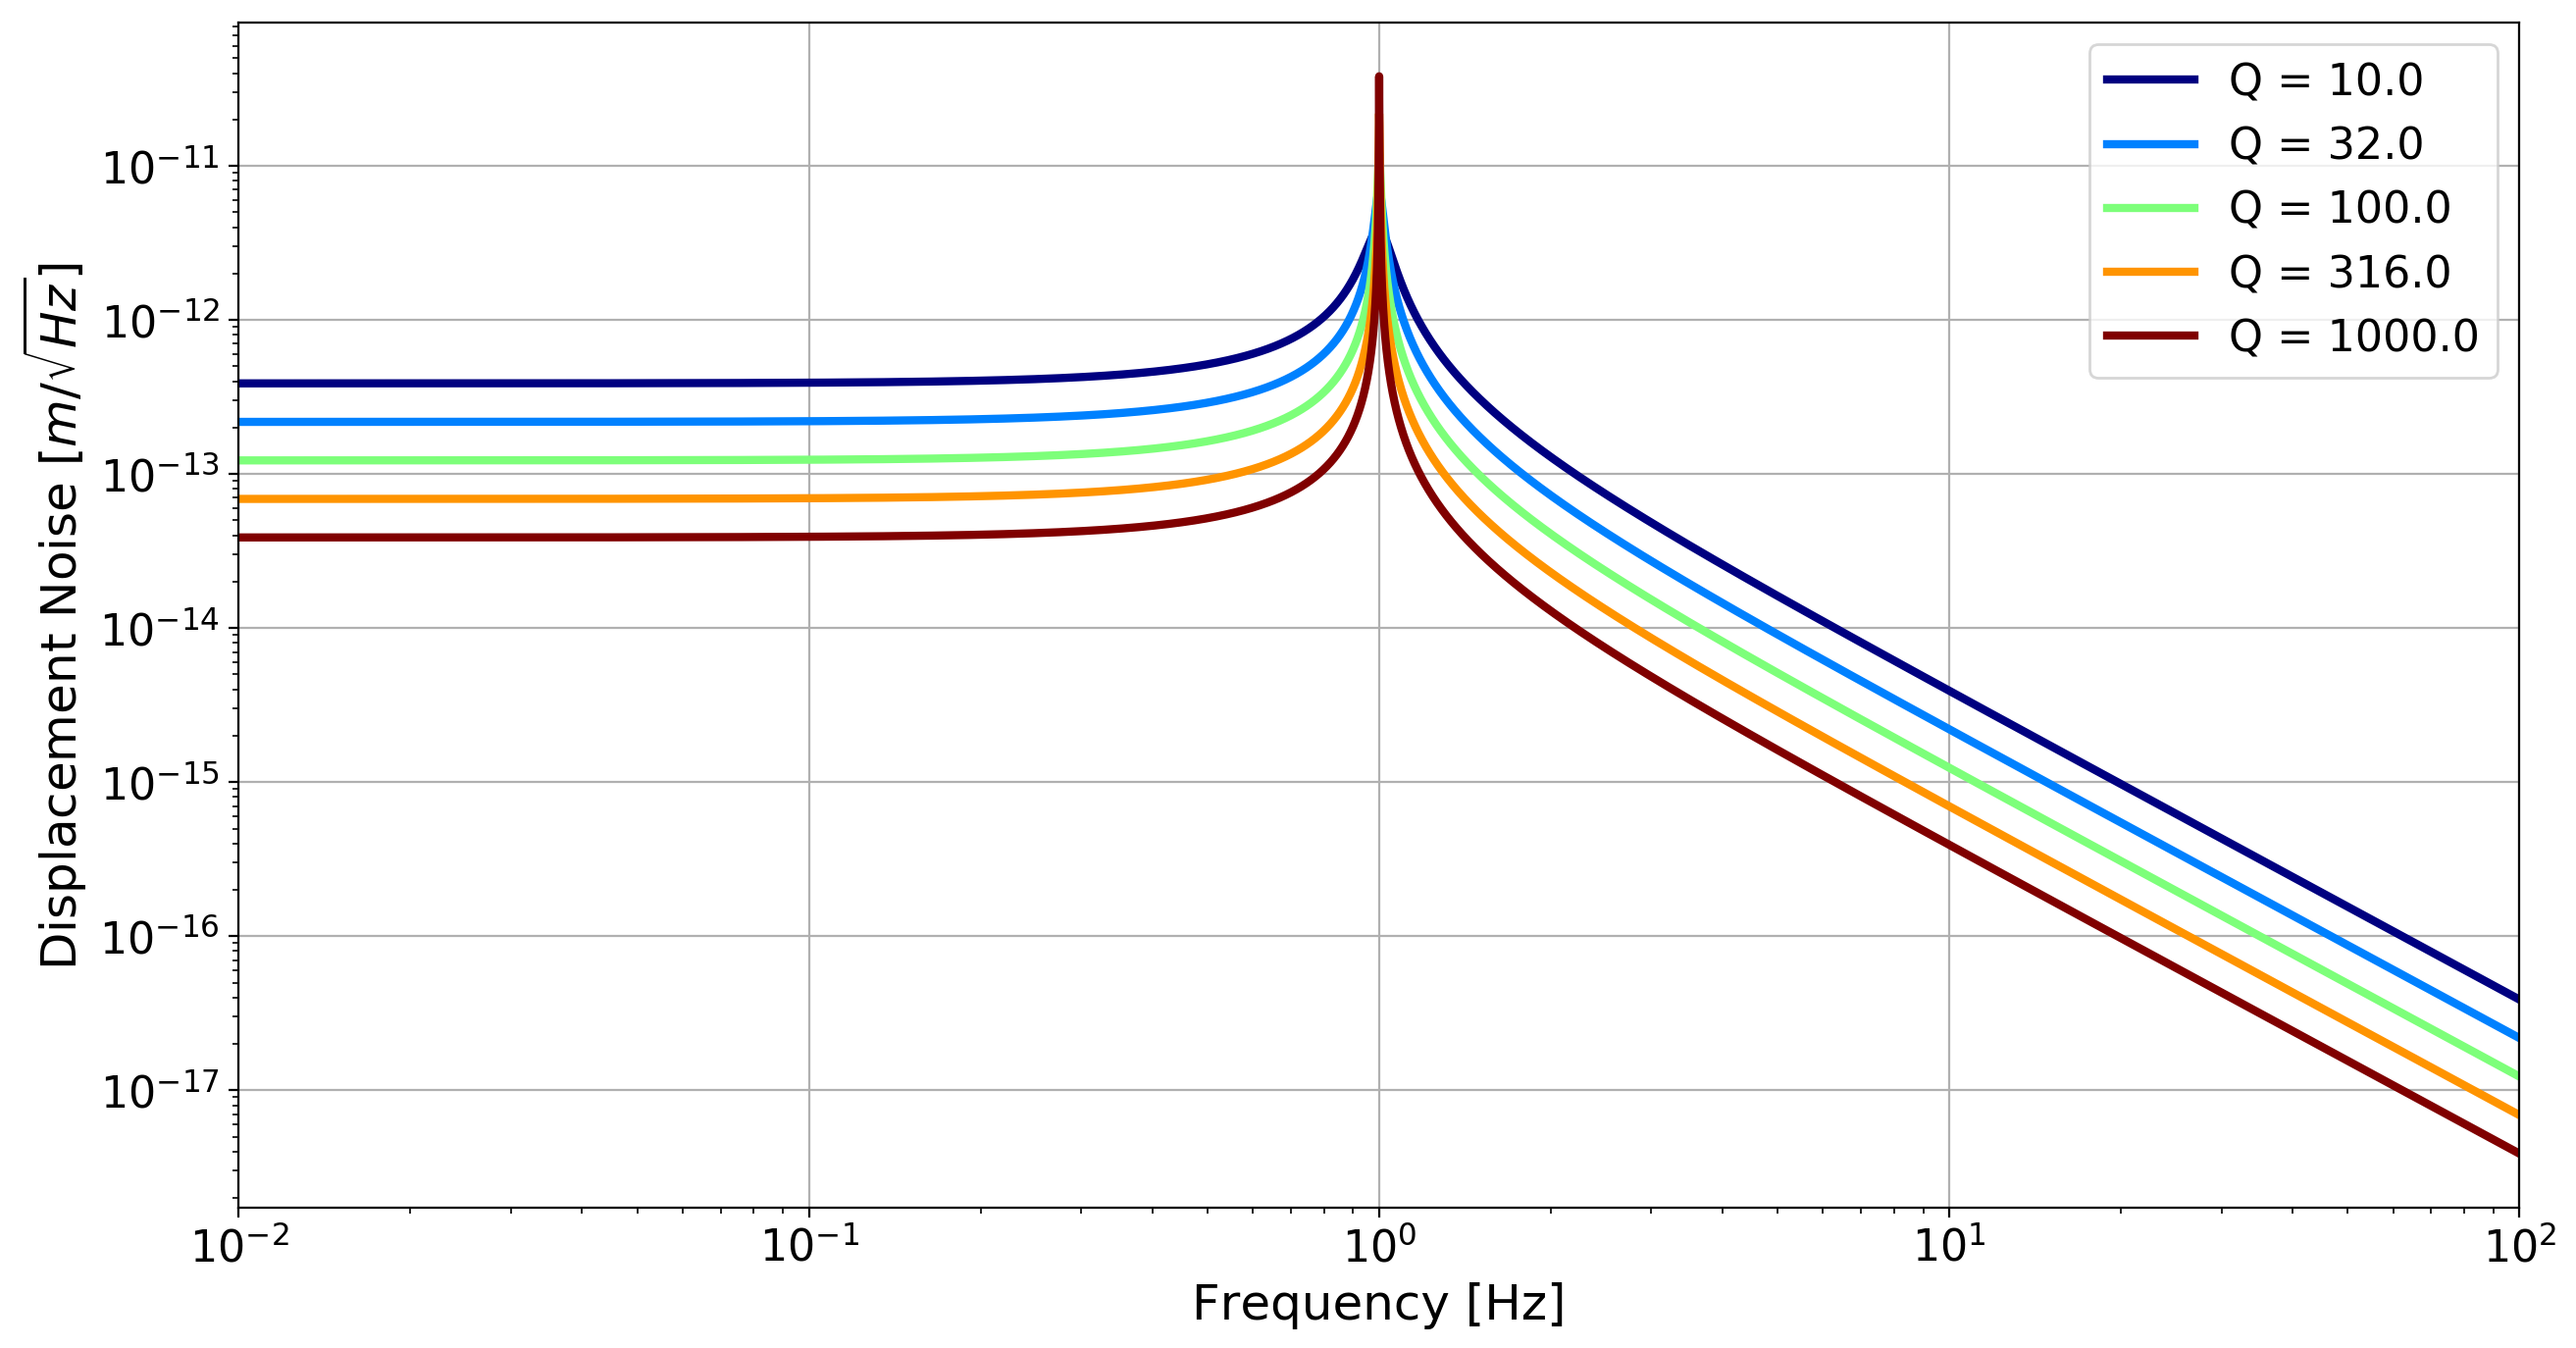

In [6]:
################################ Plot
pl.figure(figsize=(15, 8), dpi=200)

############################
pl.subplot(111)

colors = pl.cm.jet(np.linspace(0,1,n))

for i in range(n):
    pl.loglog(ang_f,np.sqrt(psd_ar[i]),color=colors[i],linewidth=3,label = "Q = "+str(round(q_ar[i])))

    
pl.xlim(ang_f[0],ang_f[-1])
pl.xlabel("Frequency [Hz]",fontsize=18)
pl.ylabel("Displacement Noise [$m/\sqrt{Hz}$]",fontsize=18)
pl.tick_params(labelsize=16)
pl.grid()
pl.legend(prop={'size': 16})

pl.savefig('../../Figures/ThermalNoise_ASD.png')